In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
from google.colab import files


In [5]:
image = files.upload()


Saving ZU1iQGpZeg.jpg to ZU1iQGpZeg.jpg


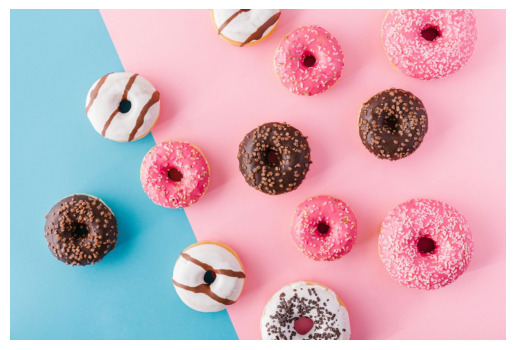

In [6]:
img = cv2.imread('/content/ZU1iQGpZeg.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [7]:
img= tf.image.convert_image_dtype(img , tf.float32)[tf.newaxis,...]

In [8]:
detector = hub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1").signatures['default']

In [9]:
result = detector (img)
result = {key: value.numpy() for key, value in result.items()}

In [10]:
scores = result['detection_scores']
boxes = result['detection_boxes']
class_names = result['detection_class_entities']

In [18]:
threshold = 0.2
confidence_scores=np.where(scores> threshold)[0]

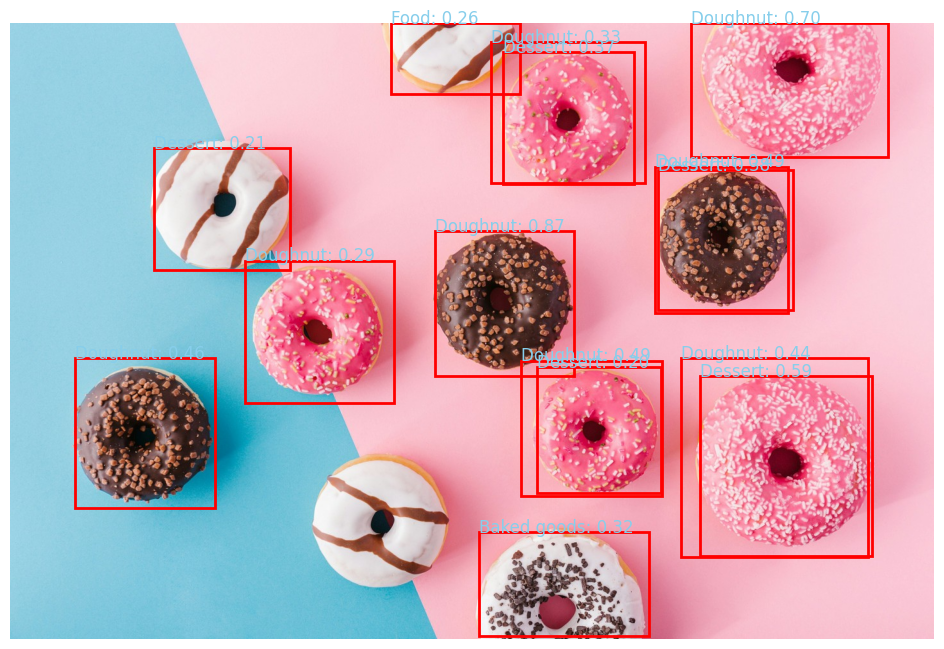

In [19]:
img= cv2.imread('/content/ZU1iQGpZeg.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
height , width , _ = img.shape

figure , ax = plt.subplots(1, figsize=(12,8))
ax.imshow(img)

for i in confidence_scores:
  box = boxes[i]
  class_name = class_names[i].decode('utf-8')
  score = scores[i]

  ymin , xmin , ymax , xmax = box
  left , right , top , bottom  =   xmin*width , xmax*width , ymin* height, ymax*height

  rectangle =patches.Rectangle( (left , top) , right-left , bottom-top , linewidth=2 , edgecolor='red' , facecolor='none')

  ax.add_patch(rectangle)
  ax.text( left, top, f'{ class_name }: { score:.2f}' , color='skyblue' , fontsize=12 )

plt.axis('off')
plt.show()